# circle - non linear dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.manifold import TSNE

In [2]:
np.random.seed(42)

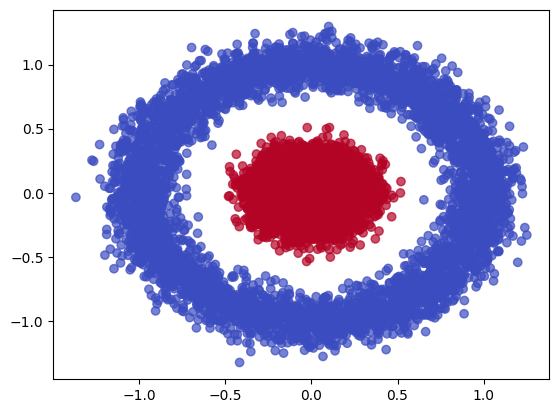

In [3]:
X, y = make_circles(n_samples=10000, noise=0.1, factor=0.2, random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.1, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

plt.scatter(X[:,0],X[:,1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [4]:
df_circles = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df_circles["target"] = y

In [5]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target
0,0.161097,0.282602,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1
1,1.198440,-0.542104,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0
2,-0.618907,0.728517,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0
3,1.070839,-0.340617,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0
4,0.843196,-0.502865,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1
9996,0.239543,0.141312,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1
9997,0.108542,0.082195,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1
9998,0.483035,0.891054,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0


### correlation matrix

In [6]:
df_circles.iloc[:,:-1].corr()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
Feature_1,1.000000,0.001393,0.002817,0.004588,0.032638,-0.004047,-0.001682,-0.009753,-0.021565,0.008278
Feature_2,0.001393,1.000000,-0.018080,0.004888,0.021876,-0.008967,-0.009958,0.008366,-0.003464,0.003770
Feature_3,0.002817,-0.018080,1.000000,-0.002950,0.001872,-0.020226,-0.004977,0.017171,-0.000396,-0.004565
Feature_4,0.004588,0.004888,-0.002950,1.000000,0.000720,0.001915,0.000832,-0.005397,0.003599,-0.006094
Feature_5,0.032638,0.021876,0.001872,0.000720,1.000000,0.000667,-0.008944,0.004178,0.005085,-0.008019
Feature_6,-0.004047,-0.008967,-0.020226,0.001915,0.000667,1.000000,-0.010911,-0.000988,0.007568,0.006202
Feature_7,-0.001682,-0.009958,-0.004977,0.000832,-0.008944,-0.010911,1.000000,0.010798,-0.009949,0.000721
Feature_8,-0.009753,0.008366,0.017171,-0.005397,0.004178,-0.000988,0.010798,1.000000,0.019187,0.007533
Feature_9,-0.021565,-0.003464,-0.000396,0.003599,0.005085,0.007568,-0.009949,0.019187,1.000000,-0.016231
Feature_10,0.008278,0.003770,-0.004565,-0.006094,-0.008019,0.006202,0.000721,0.007533,-0.016231,1.000000


<Axes: >

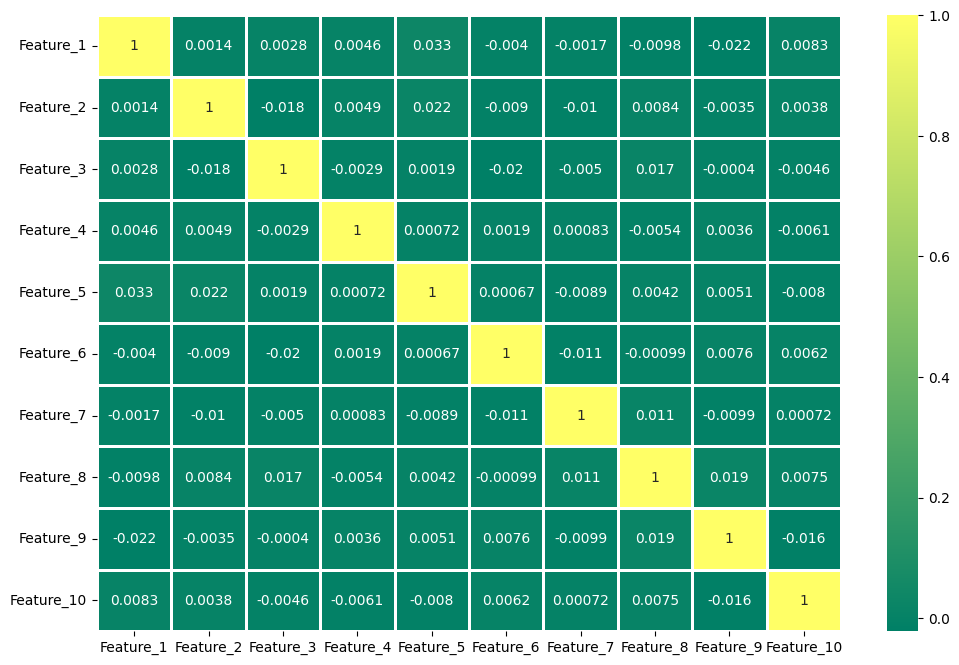

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df_circles.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [8]:
X_values = df_circles.iloc[:,:-1].values

In [9]:
y_values = df_circles.iloc[:,-1].values

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_values = scaler.fit_transform(X_values)

In [13]:
np.mean(X_values),np.std(X_values)

(6.608047442568932e-18, 1.0000000000000004)

In [14]:
pd.DataFrame(X_values)

,0,1,2,3,4,5,6,7,8,9
0,0.309049,0.544134,0.487814,-0.131574,0.640246,1.521430,-0.239134,-0.232601,1.568335,0.770058
1,2.313386,-1.040751,-0.477995,0.551327,-0.451988,-0.465752,0.236235,-1.920356,-1.730566,-0.564645
2,-1.198062,1.401072,-1.021138,0.322318,-0.889042,-1.411575,1.458002,-0.224198,0.059043,-1.430336
3,2.066837,-0.653542,-0.552874,0.118373,-1.127885,0.375008,-0.605045,-0.290453,-0.609132,1.858965
4,1.626991,-0.965343,-0.022197,-1.053824,0.812132,-1.220267,0.203188,-1.966983,-1.334462,0.197348
...,...,...,...,...,...,...,...,...,...,...
9995,0.376839,0.468127,-1.283899,1.808412,0.364697,-0.278931,-0.256623,0.282351,1.991192,1.552106
9996,0.460620,0.272608,-0.277458,0.101558,0.145516,-1.950678,-0.235408,0.213941,-0.914748,1.733294
9997,0.207503,0.159001,-1.134086,-1.011232,0.683428,0.278168,-0.457010,1.015120,0.235005,1.855828
9998,0.931093,1.713429,-1.786461,-0.516207,1.629779,0.479674,-0.110432,-0.402815,0.340891,-1.149355


<Axes: ylabel='Density'>

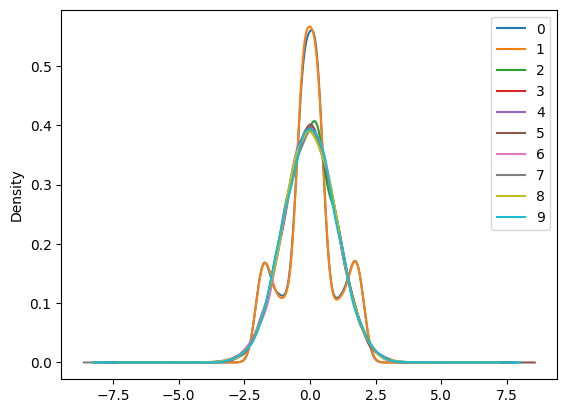

In [15]:
pd.DataFrame(X_values).plot(kind='density')

## pca application

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca_general = PCA()

In [18]:
pca_general.fit(X_values)

PCA()

In [19]:
explained_variance = pca_general.explained_variance_ratio_

In [20]:
explained_variance

array([0.10475517, 0.103268  , 0.10301747, 0.10148964, 0.10075819,
       0.09986954, 0.09933749, 0.09699266, 0.09568464, 0.0948272 ])

In [21]:
eigenvalues = pca_general.explained_variance_

In [22]:
pd.DataFrame(eigenvalues)

,0
0,1.047656
1,1.032783
2,1.030278
3,1.014998
4,1.007683
5,0.998795
6,0.993474
7,0.970024
8,0.956942
9,0.948367


In [23]:
eigenvectors = pca_general.components_

### scree plot

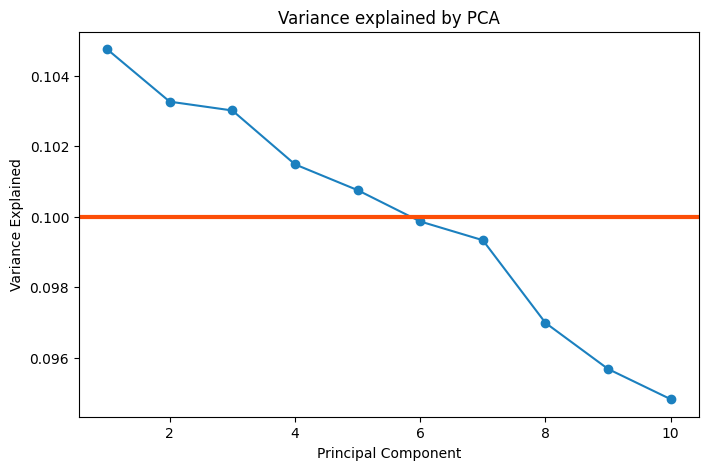

In [24]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [25]:
pca = PCA(n_components=2)

In [26]:
principal_components = pca.fit_transform(X_values)

In [27]:
pd.DataFrame(principal_components).head(8)

,0,1
0,0.193851,1.261145
1,1.869464,-2.353442
2,-0.800366,0.072630
3,1.084767,-1.741813
4,1.939726,-1.998953
5,0.436106,-0.293401
6,1.098250,0.823764
7,0.564252,0.004481


In [28]:
principal_df = pd.DataFrame(data=principal_components,columns=['principal component 1','principal component 2'])

In [29]:
final_df = pd.concat([principal_df,df_circles[['target']]],axis=1)

In [30]:
final_df

,principal component 1,principal component 2,target
0,0.193851,1.261145,1
1,1.869464,-2.353442,0
2,-0.800366,0.072630,0
3,1.084767,-1.741813,0
4,1.939726,-1.998953,0
...,...,...,...
9995,0.408520,1.300097,1
9996,1.106457,-1.064301,1
9997,0.565346,0.247487,1
9998,2.048091,1.626632,0


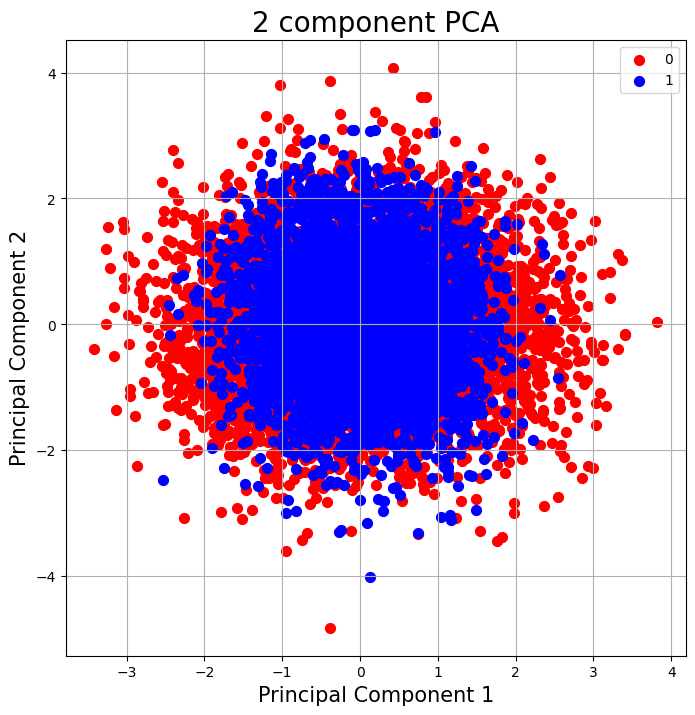

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

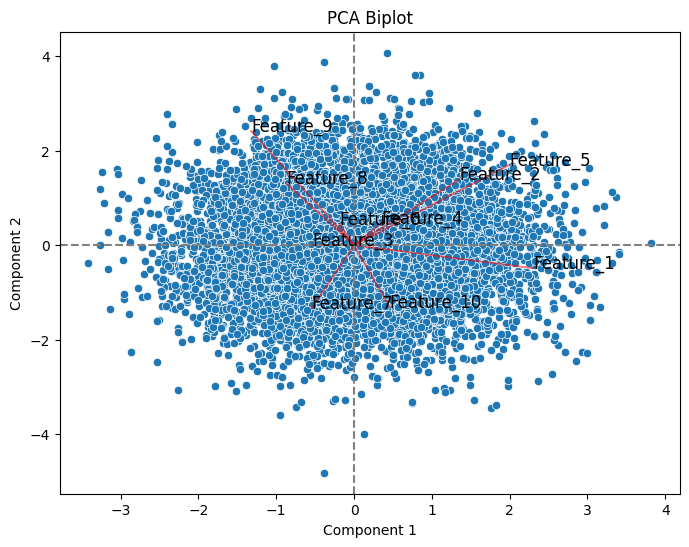

In [32]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_circles.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

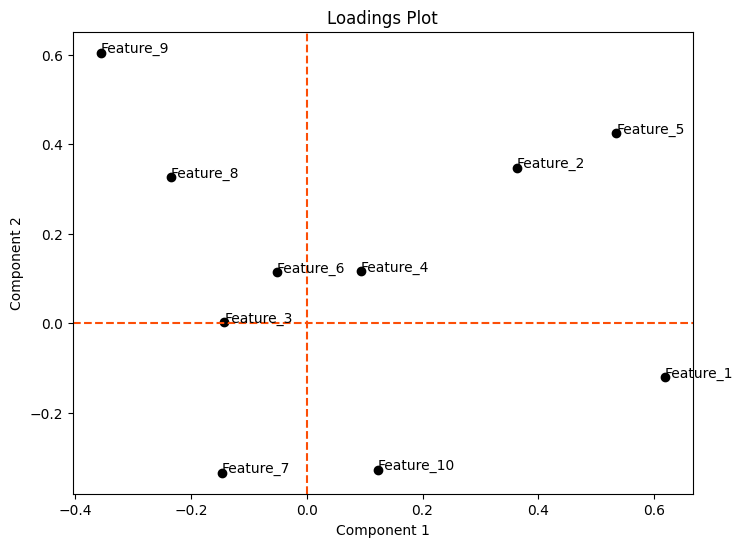

In [33]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_circles.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [34]:
scores_pca = pca.transform(X_values)

In [35]:
pd.DataFrame(scores_pca).head()

,0,1
0,0.193851,1.261145
1,1.869464,-2.353442
2,-0.800366,0.072630
3,1.084767,-1.741813
4,1.939726,-1.998953


## t-SNE

In [36]:
tsne = TSNE(n_components=2,random_state=42)

In [37]:
X_tsne = tsne.fit_transform(X_values)

In [38]:
tsne_data = np.vstack((X_tsne.T,df_circles['target'])).T

In [39]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [40]:
tsne_df

,dim_1,dim_2,target
0,14.051097,-44.561691,1.0
1,28.068321,-67.764336,0.0
2,-20.870476,61.445728,0.0
3,43.240658,-38.980209,0.0
4,59.703606,-35.863281,0.0
...,...,...,...
9995,9.822902,6.958292,1.0
9996,-5.307334,33.507313,1.0
9997,1.524347,20.691977,1.0
9998,45.070553,52.014641,0.0


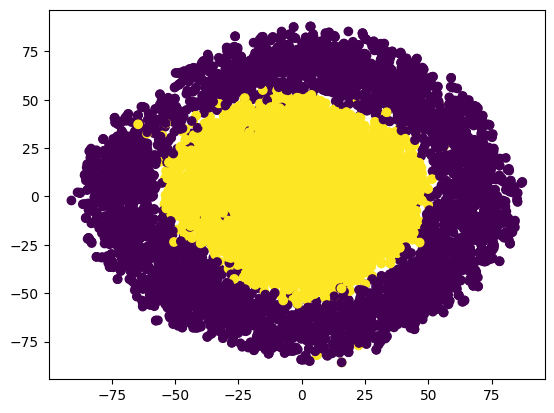

In [41]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [42]:
tsne.kl_divergence_

3.1295409202575684

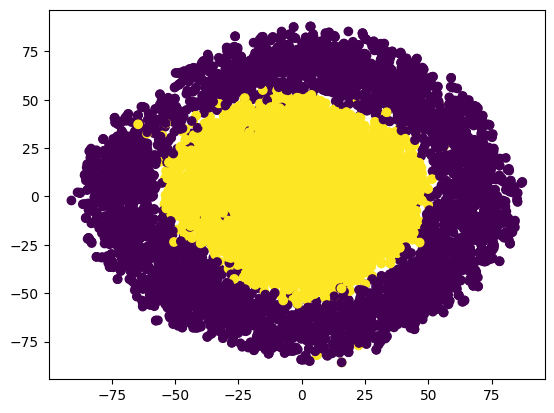

In [43]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [44]:
from sklearn.cluster import KMeans

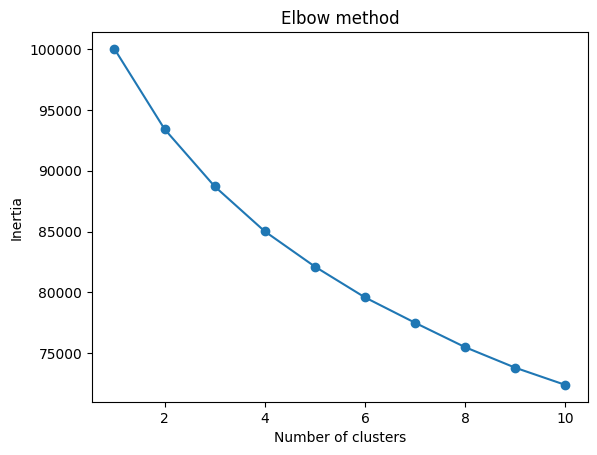

In [45]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=2,init='k-means++')

In [47]:
kmeans.fit(X_values)

KMeans(n_clusters=2)

In [48]:
df_circles['k_means'] = kmeans.labels_

In [49]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means
0,0.161097,0.282602,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,0
1,1.198440,-0.542104,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,0
2,-0.618907,0.728517,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,1
3,1.070839,-0.340617,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,0
4,0.843196,-0.502865,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,1
9996,0.239543,0.141312,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,1
9997,0.108542,0.082195,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,1
9998,0.483035,0.891054,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,0


In [50]:
from scipy.optimize import linear_sum_assignment

y_true = df_circles['target'].values  
y_kmeans = df_circles['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_circles['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_circles['k_means'] == y_true))

accuracy before: 0.4989
accuracy after: 0.5011


In [51]:
df_circles

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means
0,0.161097,0.282602,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1
1,1.198440,-0.542104,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,1
2,-0.618907,0.728517,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0
3,1.070839,-0.340617,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,1
4,0.843196,-0.502865,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0
9996,0.239543,0.141312,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0
9997,0.108542,0.082195,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0
9998,0.483035,0.891054,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,1


In [52]:
print(np.unique(df_circles['target']))

[0 1]


In [53]:
print(np.unique(kmeans.labels_))

[0 1]


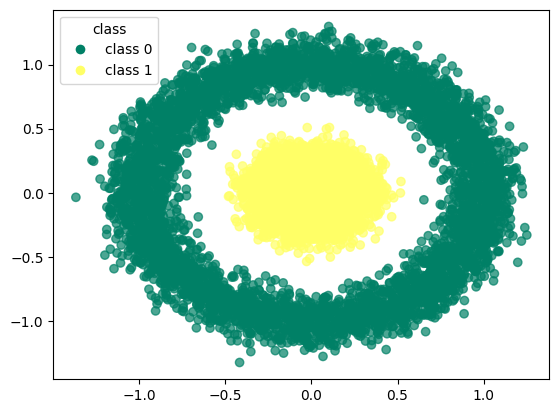

In [54]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], 
                      c=df_circles['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_circles['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

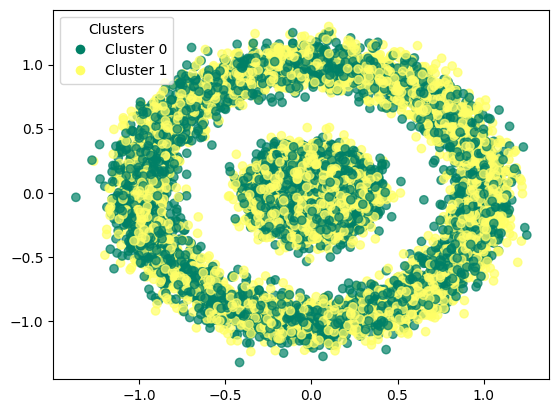

In [55]:
scatter = plt.scatter(df_circles.iloc[:, 0], df_circles.iloc[:, 1], 
                      c=df_circles['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_circles['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [56]:
kmeans.cluster_centers_

array([[ 0.07566198,  0.02586698, -0.31890707,  0.18418279, -0.13099888,
         0.42875848, -0.30655184, -0.35638843, -0.25225849, -0.10002436],
       [-0.07843574, -0.02681526,  0.33059817, -0.19093491,  0.13580129,
        -0.44447671,  0.31778999,  0.36945358,  0.26150625,  0.10369124]])

In [57]:
print(confusion_matrix(df_circles['target'],df_circles['k_means']))

[[2457 2543]
 [2446 2554]]


In [58]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      5000
           1       0.50      0.51      0.51      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



### clustering with pca

In [59]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

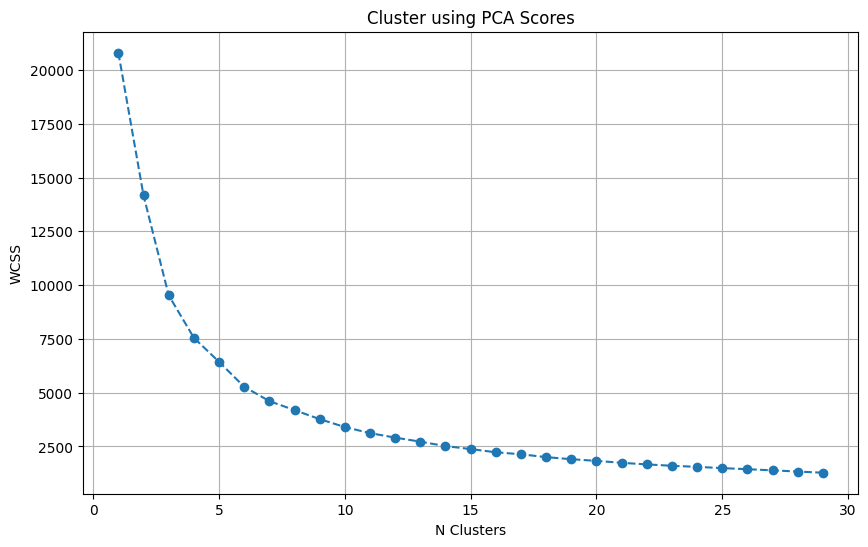

In [60]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [61]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')

In [62]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2)

In [63]:
df_pca_kmeans = df_circles.copy()

In [64]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [65]:
df_pca_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_pca
0,0.161097,0.282602,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1,0
1,1.198440,-0.542104,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,1,1
2,-0.618907,0.728517,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0,0
3,1.070839,-0.340617,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,1,1
4,0.843196,-0.502865,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0,0
9996,0.239543,0.141312,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0,1
9997,0.108542,0.082195,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0,0
9998,0.483035,0.891054,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,1,0


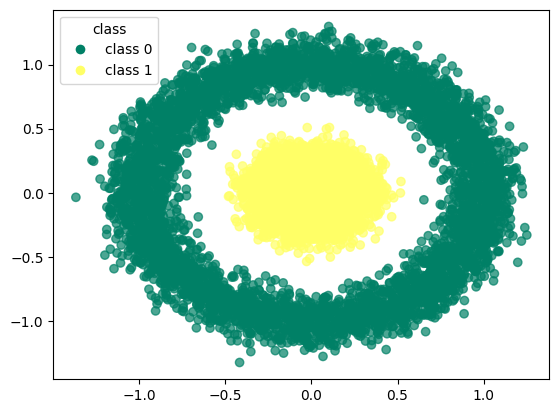

In [66]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

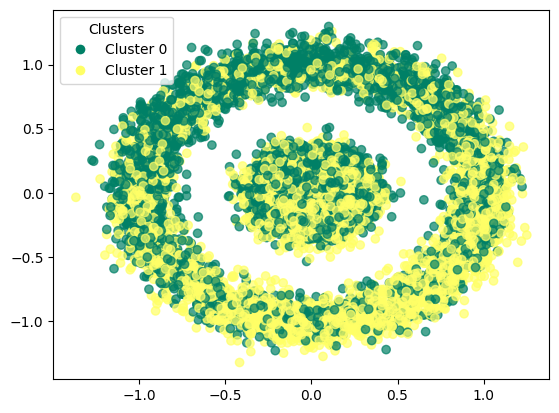

In [67]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [68]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.4925
accuracy after: 0.5075


In [69]:
df_pca_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_pca
0,0.161097,0.282602,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1,1
1,1.198440,-0.542104,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,1,0
2,-0.618907,0.728517,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0,1
3,1.070839,-0.340617,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,1,0
4,0.843196,-0.502865,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0,1
9996,0.239543,0.141312,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0,0
9997,0.108542,0.082195,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0,1
9998,0.483035,0.891054,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,1,1


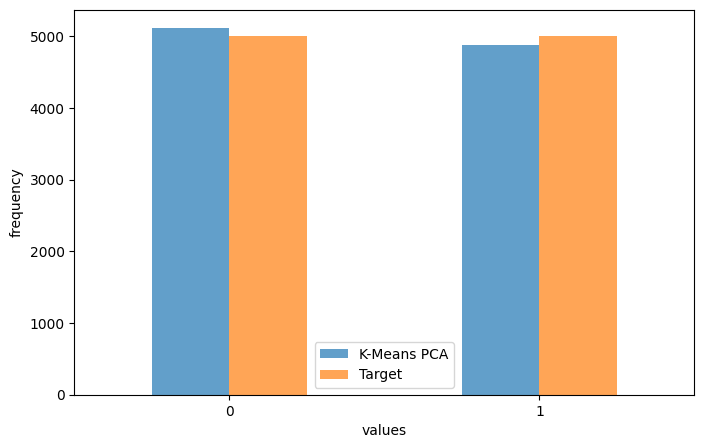

In [70]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [71]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[2595 2405]
 [2520 2480]]


In [72]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      5000
           1       0.50      0.51      0.51      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [73]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      5000
           1       0.51      0.50      0.50      5000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



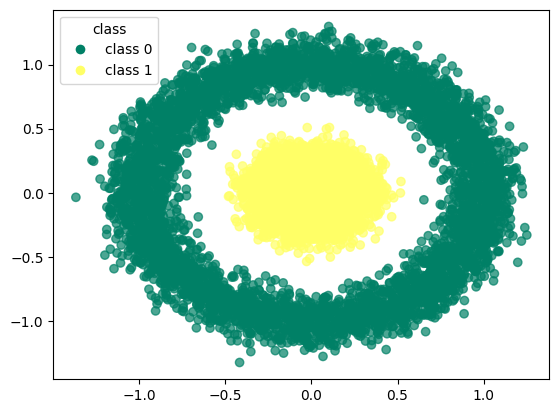

In [74]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

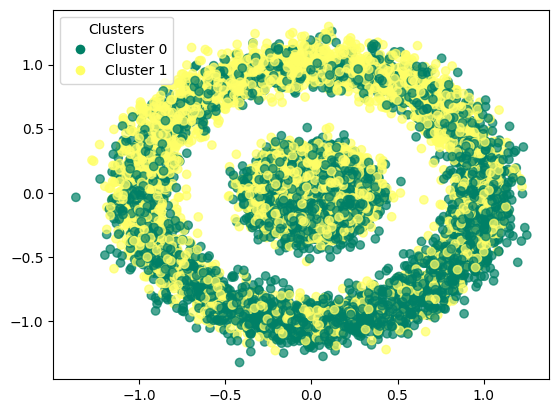

In [75]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

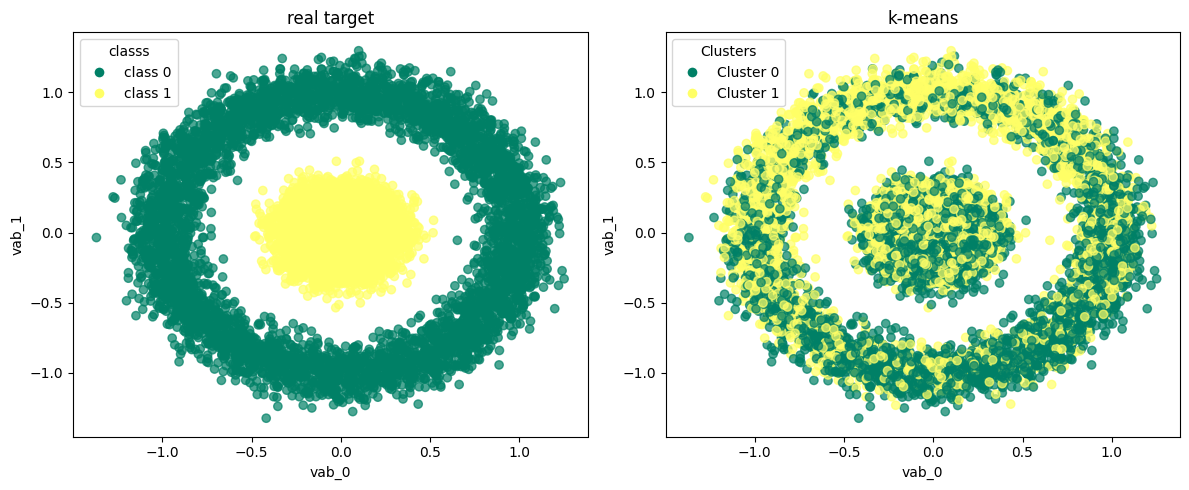

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

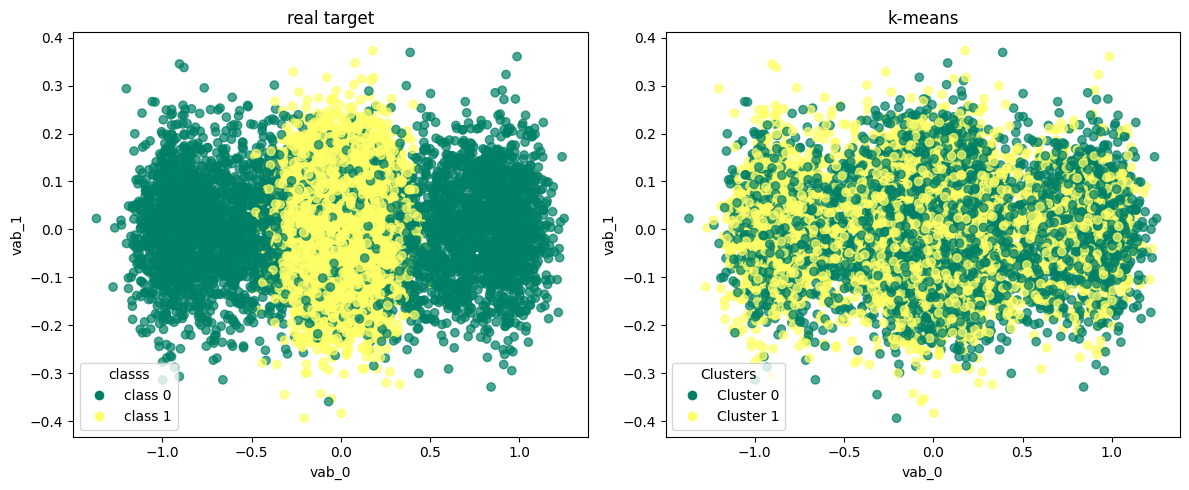

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

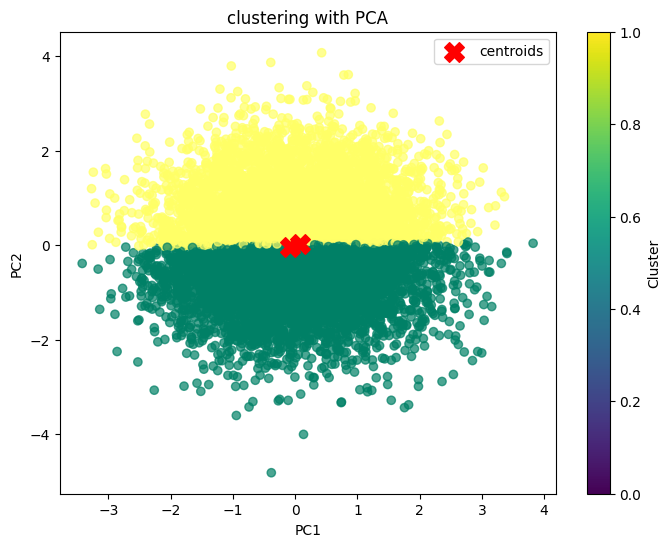

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

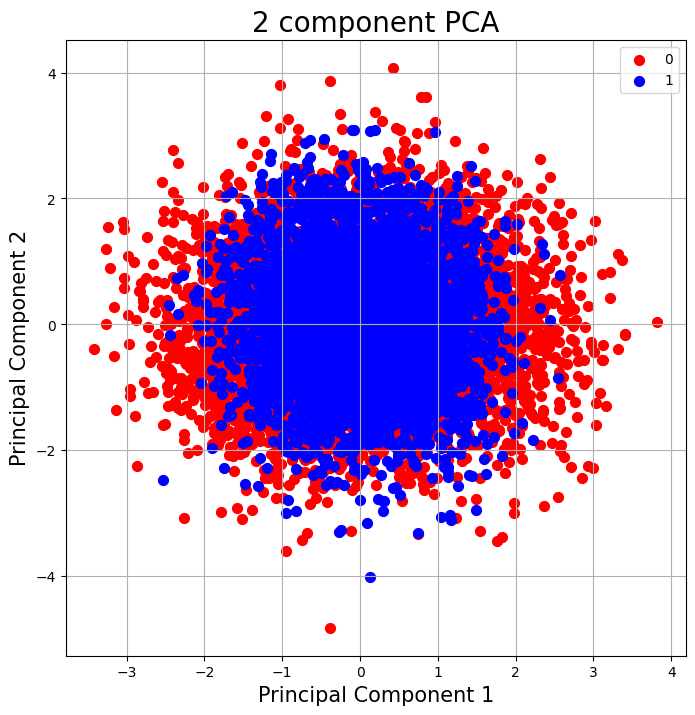

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [80]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++')

In [81]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2)

In [82]:
df_tsne_kmeans = df_circles.copy()

In [83]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [84]:
df_tsne_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_tsne
0,0.161097,0.282602,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1,1
1,1.198440,-0.542104,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,1,1
2,-0.618907,0.728517,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0,0
3,1.070839,-0.340617,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,1,0
4,0.843196,-0.502865,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0,0
9996,0.239543,0.141312,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0,0
9997,0.108542,0.082195,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0,0
9998,0.483035,0.891054,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,1,0


In [85]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.5147
accuracy after: 0.5147


In [86]:
df_tsne_kmeans

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,target,k_means,kmeans_tsne
0,0.161097,0.282602,0.049671,-0.013826,0.064769,0.152303,-0.023415,-0.023414,0.157921,0.076743,1,1,1
1,1.198440,-0.542104,-0.046947,0.054256,-0.046342,-0.046573,0.024196,-0.191328,-0.172492,-0.056229,0,1,1
2,-0.618907,0.728517,-0.101283,0.031425,-0.090802,-0.141230,0.146565,-0.022578,0.006753,-0.142475,0,0,0
3,1.070839,-0.340617,-0.054438,0.011092,-0.115099,0.037570,-0.060064,-0.029169,-0.060171,0.185228,0,1,0
4,0.843196,-0.502865,-0.001350,-0.105771,0.082254,-0.122084,0.020886,-0.195967,-0.132819,0.019686,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.196181,0.243052,-0.127570,0.179582,0.036738,-0.027876,-0.025167,0.027819,0.200274,0.154656,1,0,0
9996,0.239543,0.141312,-0.026886,0.009416,0.014441,-0.195183,-0.023042,0.021013,-0.090781,0.172708,1,0,0
9997,0.108542,0.082195,-0.112582,-0.101525,0.069162,0.027878,-0.045237,0.100722,0.024377,0.184915,1,0,0
9998,0.483035,0.891054,-0.177846,-0.052173,0.165432,0.048045,-0.010525,-0.040348,0.034982,-0.114482,0,1,0


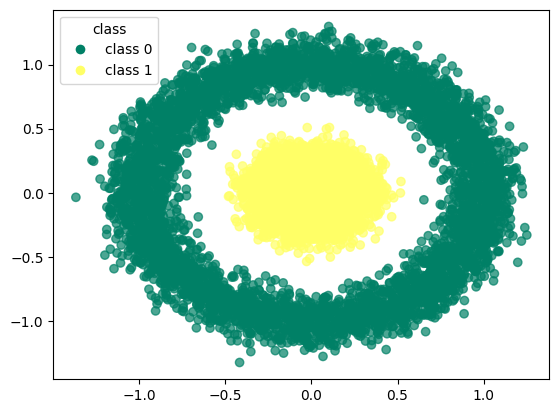

In [87]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

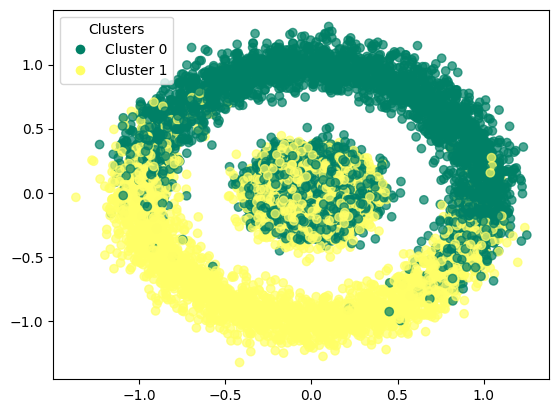

In [88]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0],df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'],cmap='summer',alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

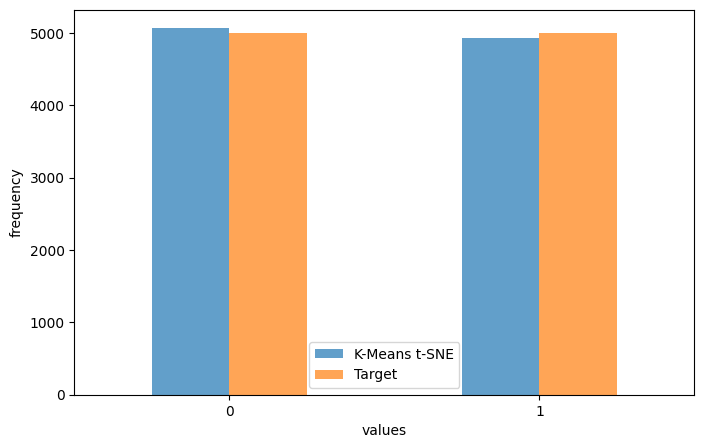

In [89]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar',figsize=(8, 5),alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [94]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[2608 2392]
 [2461 2539]]


# overall results

In [91]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.51      0.52      0.52      5000
           1       0.51      0.51      0.51      5000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



In [92]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      5000
           1       0.51      0.50      0.50      5000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.51      0.51      0.51     10000



In [93]:
print(classification_report(df_circles['target'],df_circles['k_means']))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      5000
           1       0.50      0.51      0.51      5000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

